**student:** Titouan Le Breton

# Importing packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

### Question 1

The complete joint density factorizes as
$$
q(y,z,\theta) = q(y \mid z,\theta)\, q(z \mid \theta)\, q(\theta),
$$
so that
$$
\log q(y,z,\theta)
= \log q(y \mid z,\theta)
+ \log q(z \mid \theta)
+ \log q(\theta).
$$

Given $(z,\theta)$, the $y_{i,j}$ are independent with
$$
y_{i,j} \mid z,\theta \sim \mathcal N\big(d_i(t_{i,j}),\sigma^2\big),
$$
hence, up to an additive constant $c_1$,
$$
\log q(y \mid z,\theta)
= - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^K
\left\{
\log(\sigma^2)
+ \frac{(y_{i,j}-d_i(t_{i,j}))^2}{\sigma^2}
\right\}
= -\frac{NK}{2}\log\sigma^2
  -\frac{1}{2\sigma^2} \sum_{i,j} (y_{i,j}-d_i(t_{i,j}))^2 + c_1.
$$

For the population effects,
$$
q(z_{\text{pop}} \mid \theta)
= q(t_0,v_0 \mid \bar t_0,\bar v_0)
= \mathcal N(t_0;\bar t_0,\sigma_{t_0}^2)\, \mathcal N(v_0;\bar v_0,\sigma_{v_0}^2),
$$
so
$$
\log q(z_{\text{pop}} \mid \theta)
= -\frac{1}{2\sigma_{t_0}^2}(t_0-\bar t_0)^2
  -\frac{1}{2\sigma_{v_0}^2}(v_0-\bar v_0)^2 + c_2.
$$

For the random effects,
$$
q(z_i \mid \theta)
= q(\xi_i,\tau_i \mid \sigma_\xi^2,\sigma_\tau^2)
= \mathcal N(\xi_i;0,\sigma_\xi^2)\,\mathcal N(\tau_i;0,\sigma_\tau^2),
$$
so
$$
\log q(z_i \mid \theta)
= -\frac{1}{2}\log(\sigma_\xi^2) - \frac{\xi_i^2}{2\sigma_\xi^2}
  -\frac{1}{2}\log(\sigma_\tau^2) - \frac{\tau_i^2}{2\sigma_\tau^2} + c_3,
$$
and summing over $i$ gives
$$
\log q(z_1,\dots,z_N \mid \theta)
= -\frac{N}{2}\log(\sigma_\xi^2\sigma_\tau^2)
  -\frac{1}{2\sigma_\xi^2}\sum_{i=1}^N \xi_i^2
  -\frac{1}{2\sigma_\tau^2}\sum_{i=1}^N \tau_i^2 + c_3'.
$$

On $\theta$, we have:
$$
\log q(\bar t_0,\bar v_0)
= -\frac{1}{2s_{t_0}^2}(\bar t_0-\bar{\bar t}_0)^2
  -\frac{1}{2s_{v_0}^2}(\bar v_0-\bar{\bar v}_0)^2 + c_4.
$$


$$
\log q(\sigma_\xi^2)
= -\frac{m_\xi}{2}\log(\sigma_\xi^2)
  -\frac{v_\xi}{2\sigma_\xi^2} + c_5,
$$

$$
\log q(\sigma_\tau^2)
= -\frac{m_\tau}{2}\log(\sigma_\tau^2)
  -\frac{v_\tau}{2\sigma_\tau^2} + c_6,
$$
$$
\log q(\sigma^2)
= -\frac{m}{2}\log(\sigma^2)
  -\frac{v}{2\sigma^2} + c_7.
$$
Collecting,
$$
\log q(\theta)
= -\frac{1}{2s_{t_0}^2}(\bar t_0-\bar{\bar t}_0)^2
  -\frac{1}{2s_{v_0}^2}(\bar v_0-\bar{\bar v}_0)^2
  -\frac{m_\xi}{2}\log(\sigma_\xi^2)
  -\frac{v_\xi}{2\sigma_\xi^2}
  -\frac{m_\tau}{2}\log(\sigma_\tau^2)
  -\frac{v_\tau}{2\sigma_\tau^2}
  -\frac{m}{2}\log(\sigma^2)
  -\frac{v}{2\sigma^2} + c_8.
$$

Putting everything together, and absorbing into a generic constant $C$ all terms that do not depend on $\theta$, we obtain

$$
\begin{aligned}
\log q(y,z,\theta)
=&\;
-\frac{NK}{2}\log\sigma^2
-\frac{1}{2\sigma^2}\sum_{i,j}(y_{i,j}-d_i(t_{i,j}))^2
-\frac{N}{2}\log(\sigma_\xi^2\sigma_\tau^2)
-\frac{1}{2\sigma_\xi^2}\sum_{i=1}^N \xi_i^2
-\frac{1}{2\sigma_\tau^2}\sum_{i=1}^N \tau_i^2 \\
&\;
-\frac{1}{2\sigma_{t_0}^2}(t_0-\bar t_0)^2
-\frac{1}{2\sigma_{v_0}^2}(v_0-\bar v_0)^2
-\frac{1}{2s_{t_0}^2}(\bar t_0-\bar{\bar t}_0)^2
-\frac{1}{2s_{v_0}^2}(\bar v_0-\bar{\bar v_0})^2 \\
&\;
-\frac{m_\xi}{2}\log(\sigma_\xi^2)
-\frac{v_\xi}{2\sigma_\xi^2}
-\frac{m_\tau}{2}\log(\sigma_\tau^2)
-\frac{v_\tau}{2\sigma_\tau^2}
-\frac{m}{2}\log(\sigma^2)
-\frac{v}{2\sigma^2}
+ C.
\end{aligned}
$$


We then define:
$$
S_1(y,z) = \frac{1}{KN}\sum_{i=1}^N\sum_{j=1}^K (y_{i,j} - d_i(t_{i,j}))^2,\qquad
S_2(y,z) = \frac{1}{N}\sum_{i=1}^N \xi_i^2,
$$
$$
S_3(y,z) = \frac{1}{N}\sum_{i=1}^N \tau_i^2,\qquad
S_4(y,z) = v_0,\qquad
S_5(y,z) = t_0.
$$
Then
$$
-\frac{1}{2\sigma^2}\sum_{i,j}(y_{i,j}-d_i(t_{i,j}))^2
= -\frac{KN}{2\sigma^2} S_1(y,z),
$$
$$
-\frac{1}{2\sigma_\xi^2}\sum_{i=1}^N \xi_i^2
= -\frac{N}{2\sigma_\xi^2} S_2(y,z),
\qquad
-\frac{1}{2\sigma_\tau^2}\sum_{i=1}^N \tau_i^2
= -\frac{N}{2\sigma_\tau^2} S_3(y,z),
$$
and expanding the Gaussian terms on $t_0$ and $v_0$,
$$
-\frac{1}{2\sigma_{t_0}^2}(t_0-\bar t_0)^2
= -\frac{t_0^2}{2\sigma_{t_0}^2} + \frac{t_0\bar t_0}{\sigma_{t_0}^2}
  -\frac{\bar t_0^2}{2\sigma_{t_0}^2},
$$
$$
-\frac{1}{2\sigma_{v_0}^2}(v_0-\bar v_0)^2
= -\frac{v_0^2}{2\sigma_{v_0}^2} + \frac{v_0\bar v_0}{\sigma_{v_0}^2}
  -\frac{\bar v_0^2}{2\sigma_{v_0}^2}.
$$
The terms $t_0^2$ and $v_0^2$ have coefficients independent of $\theta$. The only parts coupling $z$ and $\theta$ are
$$
\frac{\bar t_0}{\sigma_{t_0}^2} t_0 = \frac{\bar t_0}{\sigma_{t_0}^2} S_5(y,z), \qquad
\frac{\bar v_0}{\sigma_{v_0}^2} v_0 = \frac{\bar v_0}{\sigma_{v_0}^2} S_4(y,z).
$$

Thus all terms that depend simultaneously on $(y,z)$ and on $\theta$ can be written as
$$
\langle S(y,z), \Psi(\theta) \rangle
= S_1(y,z)\left(-\frac{KN}{2\sigma^2}\right)
+ S_2(y,z)\left(-\frac{N}{2\sigma_\xi^2}\right)
+ S_3(y,z)\left(-\frac{N}{2\sigma_\tau^2}\right)
+ S_4(y,z)\left(\frac{\bar v_0}{\sigma_{v_0}^2}\right)
+ S_5(y,z)\left(\frac{\bar t_0}{\sigma_{t_0}^2}\right),
$$
with
$$
S(y,z) = (S_1,S_2,S_3,S_4,S_5),
\qquad
\Psi(\theta)
=
\left(
-\frac{KN}{2\sigma^2},
-\frac{N}{2\sigma_\xi^2},
-\frac{N}{2\sigma_\tau^2},
\frac{\bar v_0}{\sigma_{v_0}^2},
\frac{\bar t_0}{\sigma_{t_0}^2}
\right).
$$

$$
\Phi(\theta)
=
\frac{NK}{2}\log\sigma^2
+ \frac{N}{2}\log(\sigma_\xi^2\sigma_\tau^2)
+ \frac{1}{2s_{t_0}^2}(\bar t_0-\bar{\bar t}_0)^2
+ \frac{1}{2s_{v_0}^2}(\bar v_0-\bar{\bar v}_0)^2
+ \frac{m_\xi}{2}\log(\sigma_\xi^2)
+ \frac{v_\xi}{2\sigma_\xi^2}
+ \frac{m_\tau}{2}\log(\sigma_\tau^2)
+ \frac{v_\tau}{2\sigma_\tau^2}
+ \frac{m}{2}\log(\sigma^2)
+ \frac{v}{2\sigma^2}
+ C

$$


### Question 2

In [8]:
HYPERPARAMS = {
    "p0": 10.0,
    "sigma_t0": 1.0,   # std for t0 | bar_t0
    "sigma_v0": 1.0    # std for v0 | bar_v0
}

THETA_PARAMS = {
    "bar_t0": 0.0,
    "bar_v0": 2.0,
    "sigma2": 0.1**2,
    "sigma_xi2": 0.3**2,
    "sigma_tau2": 0.5**2
}

def sample_z_and_y(N=10, K=100, hyper=HYPERPARAMS, theta=THETA_PARAMS):
    # sample (z, y) from the hierarchical model given θ

    p0 = hyper["p0"]
    sigma_t0 = hyper["sigma_t0"]
    sigma_v0 =hyper["sigma_v0"]

    bar_t0 = theta["bar_t0"]
    bar_v0 = theta["bar_v0"]
    sigma2= theta["sigma2"]
    sigma_xi2 = theta["sigma_xi2"]
    sigma_tau2 = theta["sigma_tau2"]

    # population effects t0, v0
    t0 = np.random.normal(bar_t0, sigma_t0)
    v0 = np.random.normal(bar_v0, sigma_v0)

    # individual variables
    xi = np.random.normal(0.0, np.sqrt(sigma_xi2), N)
    tau = np.random.normal(0.0, np.sqrt(sigma_tau2), N)
    alpha = np.exp(xi)

    t_grid = np.linspace(0.0, 10.0, K)

    def d(t):
        return p0 + v0 * (t - t0)

    y =np.zeros((N, K))
    for i in range(N):
        t_eff = alpha[i] * (t_grid - t0 - tau[i]) + t0
        eps= np.random.normal(0.0, np.sqrt(sigma2), K)
        y[i] = d(t_eff) + eps

    z = {"t0": t0, "v0": v0, "xi": xi, "tau": tau, "alpha": alpha}
    return y, t_grid, z


t0 = 0.313, v0 = 3.048


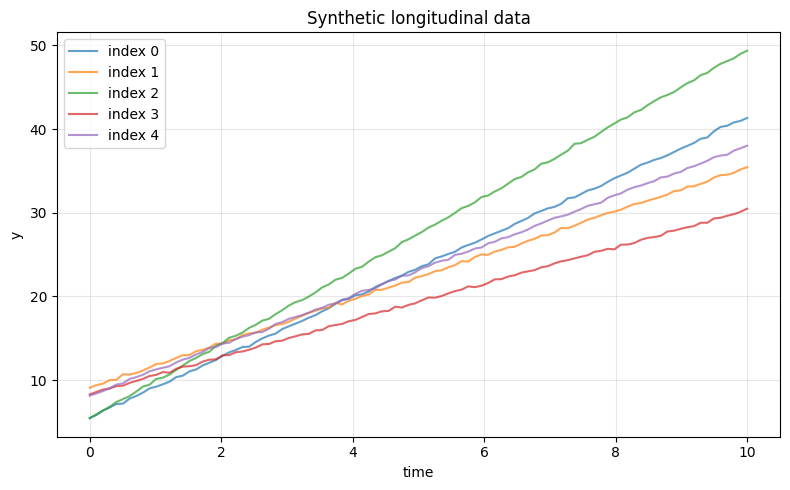

In [9]:
N, K = 10, 100
y, t_grid, z = sample_z_and_y(N=N, K=K)

print(f"t0 = {z['t0']:.3f}, v0 = {z['v0']:.3f}")

plt.figure(figsize=(8, 5))
for i in range(min(5, N)):
    plt.plot(t_grid, y[i], alpha=0.7, label=f"index {i}")

plt.xlabel("time")
plt.ylabel("y")
plt.title("Synthetic longitudinal data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Question 3

We have:
$$
p(z \mid y,\theta) \;\propto\; p(y \mid z,\theta)\, p(z \mid \theta),
$$
because $p(y | \theta)$ is a constant in  this context of Gibbs sampling inside HM.

We compute the log each of the two terms:
$$
\log p(y \mid z,\theta)
= -\frac{NK}{2}\log\sigma^2
  -\frac{1}{2\sigma^2}\sum_{i=1}^N\sum_{j=1}^K (y_{i,j}-d_i(t_{i,j}))^2
  + C_1.
$$

$$
\log p(z \mid \theta)
=
-\frac{(t_0-\bar t_0)^2}{2\sigma_{t_0}^2}
-\frac{(v_0-\bar v_0)^2}{2\sigma_{v_0}^2}
-\frac{1}{2\sigma_\xi^2}\sum_{i=1}^N \xi_i^2
-\frac{1}{2\sigma_\tau^2}\sum_{i=1}^N \tau_i^2
-\frac{N}{2}\log(\sigma_\xi^2\sigma_\tau^2)
+ C_2.
$$

Therefore, up to an additive constant:
$$
\log p(z \mid y,\theta)
=
-\frac{1}{2\sigma^2}\sum_{i,j}(y_{i,j}-d_i(t_{i,j}))^2
-\frac{(t_0-\bar t_0)^2}{2\sigma_{t_0}^2}
-\frac{(v_0-\bar v_0)^2}{2\sigma_{v_0}^2}
-\frac{1}{2\sigma_\xi^2}\sum_i \xi_i^2
-\frac{1}{2\sigma_\tau^2}\sum_i \tau_i^2
$$


In [10]:
def log_posterior_z(z, y, t_grid, theta, hyper):
    N, K = y.shape
    t0, v0 = z[0], z[1]
    xi  = z[2:2+N]
    tau = z[2+N:2+2*N]

    p0 = hyper["p0"]
    sigma_t0  = hyper["sigma_t0"]
    sigma_v0 = hyper["sigma_v0"]
    bar_t0 = theta["bar_t0"]
    bar_v0 = theta["bar_v0"]
    sigma2  = theta["sigma2"]
    sigma_xi2 = theta["sigma_xi2"]
    sigma_tau2 = theta["sigma_tau2"]

    # likelihood
    alpha = np.exp(xi)
    t_eff = alpha.reshape(-1,1) * (t_grid.reshape(1,-1) - t0 - tau.reshape(-1,1)) + t0
    mean_y = p0 + v0 * (t_eff - t0)
    rss = np.sum((y - mean_y)**2)
    log_like = -0.5 * rss / sigma2

    # priors
    lp = -0.5*(t0-bar_t0)**2/(sigma_t0**2)
    lp +=-0.5*(v0-bar_v0)**2/ (sigma_v0**2)
    lp += -0.5*np.sum(xi**2)/sigma_xi2
    lp += -0.5*np.sum(tau**2)/sigma_tau2

    return log_like + lp


def mh_sampler_z(y, t_grid, theta, hyper,
                 n_iter=3000, prop_scale=0.05):
    # Simple symmetric RW Metropolis
    N, K = y.shape
    d = 2*N + 2

    t0_0 = theta["bar_t0"]
    v0_0 = theta["bar_v0"]
    xi0  = np.zeros(N)
    tau0 = np.zeros(N)
    z_cur = np.concatenate(([t0_0, v0_0], xi0, tau0))


    chain = np.zeros((n_iter, d))
    chain[0] = z_cur
    logpi_cur = log_posterior_z(z_cur, y, t_grid, theta, hyper)
    acc = 0

    for k in range(1, n_iter):
        z_prop = z_cur + prop_scale * np.random.normal(size=d)
        logpi_prop = log_posterior_z(z_prop, y, t_grid, theta, hyper)

        if np.log(np.random.rand()) < (logpi_prop - logpi_cur):
            z_cur = z_prop
            logpi_cur = logpi_prop
            acc += 1

        chain[k] = z_cur

    burnin = n_iter // 2
    return chain[burnin:], acc / n_iter

### Question 4

Since $-\Phi(\theta)+\langle S^{(k)},\Psi(\theta)\rangle$ is a sum of terms that depend linearly or quadratically on each component of $\theta$, each update is obtained by taking the derivative with respect to that component, setting it to $0$, and solving the resulting linear equation.


So during the M step, the parameters are updated as follows:


$$
\bar t_0^{(k+1)}
=
\frac{
    \displaystyle \frac{S_5^{(k+1)}}{\sigma_{t_0}^2}
    + \displaystyle \frac{\bar{\bar t}_0}{s_{t_0}^2}
}{
    \displaystyle \frac{1}{\sigma_{t_0}^2}
    + \displaystyle \frac{1}{s_{t_0}^2}
},
\qquad
\bar v_0^{(k+1)}
=
\frac{
    \displaystyle \frac{S_4^{(k+1)}}{\sigma_{v_0}^2}
    + \displaystyle \frac{\bar{\bar v}_0}{s_{v_0}^2}
}{
    \displaystyle \frac{1}{\sigma_{v_0}^2}
    + \displaystyle \frac{1}{s_{v_0}^2}
}.
$$


$$
\sigma^{2\,(k+1)}
=
\frac{KN\, S_1^{(k+1)}}{NK + m + 2},
\qquad
\sigma_{\xi}^{2\,(k+1)}
=
\frac{N\, S_2^{(k+1)}}{N + m_\xi + 2},
\qquad
\sigma_{\tau}^{2\,(k+1)}
=
\frac{N\, S_3^{(k+1)}}{N + m_\tau + 2}.
$$



In [11]:
### Helper/Intermediary functions for MH-SAEM

def compute_S(y, t_grid, z, hyper):
    # Compute sufficient statistics S  for given z
    N, K = y.shape
    t0, v0 = z[0], z[1]
    xi = z[2:2+N]
    tau = z[2+N:2+2*N]

    p0 = hyper["p0"]

    alpha = np.exp(xi)
    t_eff = alpha.reshape(-1,1) * (t_grid.reshape(1,-1) - t0 - tau.reshape(-1,1)) + t0
    mean_y = p0 + v0 * (t_eff - t0)

    S1 = np.sum((y - mean_y)**2) / (N * K)   # avg squared residual
    S2 = np.sum(xi**2) / N                   # avg xi^2
    S3 = np.sum(tau**2) / N                  # avg tau^2
    S4 = v0                                  
    S5 = t0                                  
    return np.array([S1, S2, S3, S4, S5])


def m_step_theta(S, hyper, prior, N, K):
    S1, S2, S3, S4, S5 = S

    sigma_t0 = hyper["sigma_t0"]
    sigma_v0 = hyper["sigma_v0"]

    barbar_t0 = prior["barbar_t0"]
    s_t0 = prior["s_t0"]
    barbar_v0 = prior["barbar_v0"]
    s_v0 = prior["s_v0"]
    m = prior["m"]
    m_xi= prior["m_xi"]
    m_tau = prior["m_tau"]

    # bar_t0
    num_t0= S5 /(sigma_t0**2) + barbar_t0 / (s_t0**2)
    den_t0 = 1.0 /(sigma_t0**2) + 1.0 / (s_t0**2)
    bar_t0 = num_t0/den_t0

    # bar_v0
    num_v0 = S4 /(sigma_v0**2) + barbar_v0/(s_v0**2)
    den_v0 = 1.0 / (sigma_v0**2) + 1.0/ (s_v0**2)
    bar_v0 = num_v0 / den_v0

    # variances
    sigma2     = (K * N * S1) / (N *K + m+2.0)
    sigma_xi2  = (N * S2) / (N + m_xi + 2.0)
    sigma_tau2 = (N * S3) / (N + m_tau + 2.0)

    return {
        "bar_t0": bar_t0,
        "bar_v0": bar_v0,
        "sigma2": sigma2,
        "sigma_xi2": sigma_xi2,
        "sigma_tau2": sigma_tau2,
    }

### Full implementation of for MH-SAEM

def hm_saem(y, t_grid, hyper, prior,
            max_iter=50, nb=None, alpha=0.6,
            mh_iter=200, prop_scale=0.03):

    N, K = y.shape
    d = 2 * N + 2
    if nb is None:
        nb = max_iter // 2  # burn-in length

    # internal initialization of theta_0
    bar_t0_0 = prior["barbar_t0"]
    bar_v0_0 = prior["barbar_v0"]
    sigma2_0 = float(np.var(y)) if np.var(y) > 0 else 1.0
    sigma_xi2_0  = prior.get("sigma_xi2_0", 0.5)
    sigma_tau2_0 = prior.get("sigma_tau2_0", 0.5)

    theta = {
        "bar_t0":bar_t0_0,
        "bar_v0": bar_v0_0,
        "sigma2":sigma2_0,
        "sigma_xi2": sigma_xi2_0,
        "sigma_tau2": sigma_tau2_0,
    }

    # initial z and sufficient statistics
    z = np.zeros(d)
    S = np.zeros(5)

    for k in range(max_iter):
        #simulation: z^{k+1} with dist q(. | y, theta^k)
        chain, _ = mh_sampler_z(y, t_grid, theta, hyper,
                                n_iter=mh_iter,
                                prop_scale=prop_scale)
        z = chain[-1]

        # stochastic approximations
        S_new = compute_S(y, t_grid, z, hyper)
        if k < nb:
            eps = 1.0
        else:
            eps = (k - nb + 1) ** (-alpha)
        S = S + eps * (S_new - S)

        # Maximization: theta^{k+1} = argmax ...
        theta = m_step_theta(S, hyper, prior, N, K)

    return theta, S, z


We test how well the model performs: we set the prior, then sample from the prior multiple times to see if the models is able to estimate the $\theta_i$ well:

In [12]:
def run_verification_multiple_runs(n_runs=20, N=10, K=100, max_iter=40, mh_iter=200, prop_scale=0.03):
    # Fixed hyperparameters for EM
    hyper_em = {
        "p0": HYPERPARAMS["p0"],
        "sigma_t0": 1.0,
        "sigma_v0": 1.0,
    }

    # fixed hyperpriors for EM
    prior_em = {
        "barbar_t0": 0.0,
        "s_t0": 0.5,
        "barbar_v0": 2.0,
        "s_v0": 0.5,
        "m": 5.0,
        "m_xi": 5.0,
        "m_tau": 5.0,
        "sigma_xi2_0": THETA_PARAMS["sigma_xi2"],
        "sigma_tau2_0": THETA_PARAMS["sigma_tau2"],
    }

    # error arrays
    errs_t0 = []
    errs_v0 = []
    errs_s2 = []
    errs_sxi2 = []
    errs_stau2 = []

    for _ in range(n_runs):
        # sample true bar_t0 and bar_v0 from hyperpriors
        bar_t0_true = np.random.normal(prior_em["barbar_t0"], prior_em["s_t0"])
        bar_v0_true = np.random.normal(prior_em["barbar_v0"], prior_em["s_v0"])

        # copy base parameters and overwrite bar_t0, bar_v0
        theta_true = THETA_PARAMS.copy()
        theta_true["bar_t0"] = bar_t0_true
        theta_true["bar_v0"] =bar_v0_true

        # generate synthetic data
        y, t_grid, z_true = sample_z_and_y(N=N, K=K, hyper=HYPERPARAMS, theta=theta_true)

        # true parameters are bar_t0_true and bar_v0_true (NOT t0 in z_true)
        t0_true = theta_true["bar_t0"]
        v0_true = theta_true["bar_v0"]

        sigma2_true     = theta_true["sigma2"]
        sigma_xi2_true  = theta_true["sigma_xi2"]
        sigma_tau2_true = theta_true["sigma_tau2"]

        # run SAEM
        theta_hat, S_hat, z_last = hm_saem(
            y, t_grid, hyper=hyper_em, prior=prior_em,
            max_iter=max_iter, nb=None, alpha=0.6,
            mh_iter=mh_iter, prop_scale=prop_scale
        )

        # record absolute errors
        errs_t0.append(abs(theta_hat["bar_t0"] - t0_true))
        errs_v0.append(abs(theta_hat["bar_v0"] - v0_true))
        errs_s2.append(abs(theta_hat["sigma2"] - sigma2_true))
        errs_sxi2.append(abs(theta_hat["sigma_xi2"] - sigma_xi2_true))
        errs_stau2.append(abs(theta_hat["sigma_tau2"] - sigma_tau2_true))

    # summary
    print("Verification over", n_runs, "runs")
    print("Mean absolute errors:")
    print("bar_t0:", np.mean(errs_t0))
    print("bar_v0:", np.mean(errs_v0))
    print("sigma2:", np.mean(errs_s2))
    print("sig_xi2 :", np.mean(errs_sxi2))
    print("sig_tau2:", np.mean(errs_stau2))

    print("Variance of absolute errors:")
    print("var(bar_t0) :", np.var(errs_t0))
    print("var(bar_v0):", np.var(errs_v0))
    print("var(sigma2)  :", np.var(errs_s2))
    print(" var(sig_xi2) :", np.var(errs_sxi2))
    print("var(sig_tau2):", np.var(errs_stau2))

    return {
        "t0": np.array(errs_t0),
        "v0": np.array(errs_v0),
        "sigma2": np.array(errs_s2),
        "sigma_xi2": np.array(errs_sxi2),
        "sigma_tau2": np.array(errs_stau2),
    }


errs = run_verification_multiple_runs(n_runs=100, N=10, K=100, max_iter=40, mh_iter=200, prop_scale=0.03)


Verification over 100 runs
Mean absolute errors:
bar_t0: 0.34386259069419656
bar_v0: 0.34821018022859107
sigma2: 1.588737922784589
sig_xi2 : 0.03865940686673516
sig_tau2: 0.2200678107488003
Variance of absolute errors:
var(bar_t0) : 0.060667239813729526
var(bar_v0): 0.07873570375794489
var(sigma2)  : 10.325794982491717
 var(sig_xi2) : 0.00032698114402763824
var(sig_tau2): 8.109155268233664e-05


**observation:** The model performs well. Errors on $t_0$ and $v_0$ are slighgtly high, but overall the variance of the error is low and the estimation is good.

### Question 5

We use Bayes' rule and conditional independence:
$$
p(z_i \mid z_{\text{pop}},y,\theta)
\propto p(y_i \mid z_i,z_{\text{pop}},\theta)\,p(z_i\mid\theta).
$$
We compute the log of both probabilities:

$$
\log p(y_i \mid z_i,z_{\text{pop}},\theta)
=-\frac{1}{2\sigma^2}\sum_{j=1}^K\bigl(y_{i,j}-d_i(\xi_i,\tau_i)\bigr)^2+\text{const}.
$$

$$
\log p(z_i\mid\theta)
=-\frac{\xi_i^2}{2\sigma_\xi^2}-\frac{\tau_i^2}{2\sigma_\tau^2}+\text{const}.
$$

Adding both terms yields the full conditional (up to an additive constant):
$$
\log \pi_i(\xi_i,\tau_i)
= -\frac{1}{2\sigma^2}\sum_{j=1}^K 
\bigl(y_{i,j}-d_i(\xi_i,\tau_i)\bigr)^2
-\frac{\xi_i^2}{2\sigma_\xi^2}
-\frac{\tau_i^2}{2\sigma_\tau^2}
+\text{const}.
$$
A Metropolis-Hastings step inside the Gibbs sampler is:
$$
(\xi_i^{\ast},\tau_i^{\ast})=(\xi_i,\tau_i)+\eta,\qquad 
\eta\sim\mathcal N(0,\sigma_{\text{prop}}^2 I_2),
$$
$$
\alpha_i=\min\Bigl(1,\exp\bigl[\log\pi_i(\xi_i^{\ast},\tau_i^{\ast})-\log\pi_i(\xi_i,\tau_i)\bigr]\Bigr),
$$
and we set $(\xi_i,\tau_i)\leftarrow(\xi_i^{\ast},\tau_i^{\ast})$ with probability $\alpha_i$.


### Question 6

Using Bayes' rule and the conditional independence over $i$:
$$
p(z_{\text{pop}}\mid z,y,\theta)
\propto p(y \mid z_{\text{pop}},z,\theta)\,p(z_{\text{pop}}\mid\theta).
$$
We compute the log of both probabilities:
$$
\log p(y\mid z_{\text{pop}},z,\theta)
=-\frac{1}{2\sigma^2}\sum_{i=1}^N\sum_{j=1}^K
\bigl(y_{i,j}-d_i(t_0,v_0)\bigr)^2+\text{const}.
$$
$$
\log p(z_{\text{pop}}\mid\theta)
=-\frac{(t_0-\bar t_0)^2}{2\sigma_{t_0}^2}
-\frac{(v_0-\bar v_0)^2}{2\sigma_{v_0}^2}
+\text{const}.
$$
The final log-probability is thus:
$$
\log \pi_{\text{pop}}(t_0,v_0)
= -\frac{1}{2\sigma^2}\sum_{i=1}^N\sum_{j=1}^K
\bigl(y_{i,j}-d_i(t_0,v_0)\bigr)^2
-\frac{(t_0-\bar t_0)^2}{2\sigma_{t_0}^2}
-\frac{(v_0-\bar v_0)^2}{2\sigma_{v_0}^2}
+\text{const}.
$$
A Metropolis-Hastings step is:
$$
(t_0^{\ast},v_0^{\ast})=(t_0,v_0)+\eta,\qquad 
\eta\sim\mathcal N(0,\sigma_{\text{prop,pop}}^2 I_2),
$$
$$
\alpha_{\text{pop}}=\min\Bigl(1,\exp\bigl[\log\pi_{\text{pop}}(t_0^{\ast},v_0^{\ast})-\log\pi_{\text{pop}}(t_0,v_0)\bigr]\Bigr),
$$
and we accept $(t_0^{\ast},v_0^{\ast})$ with probability $\alpha_{\text{pop}}$.


### Question 7

In [13]:
def hmwg_step_coordwise(z, y, t_grid, theta, hyper, sigma_pop=0.02, sigma_indiv=0.05):
    # One HM-within-Gibbs sweep, updating coordinates one-by-one
    N, K = y.shape
    z_cur = z.copy()
    logpi_cur = log_posterior_z(z_cur, y, t_grid, theta, hyper)

    # update t0 (idx 0) and v0 (idx 1) separately
    for idx, scale in [(0, sigma_pop), (1, sigma_pop)]:
        z_prop = z_cur.copy()
        z_prop[idx] += scale * np.random.normal()
        logpi_prop = log_posterior_z(z_prop, y, t_grid, theta, hyper)
        if np.log(np.random.rand()) < (logpi_prop - logpi_cur):
            z_cur = z_prop
            logpi_cur = logpi_prop

    # update all xi_i and tau_i one-by-one
    for i in range(N):
        idx_xi = 2 + i
        idx_tau = 2 + N + i
        for idx, scale in [(idx_xi, sigma_indiv), (idx_tau, sigma_indiv)]:
            z_prop = z_cur.copy()
            z_prop[idx] += scale * np.random.normal()
            logpi_prop = log_posterior_z(z_prop, y, t_grid, theta, hyper)
            if np.log(np.random.rand()) < (logpi_prop - logpi_cur):
                z_cur = z_prop
                logpi_cur = logpi_prop

    return z_cur


def hmwg_saem(y, t_grid, hyper, prior,
              max_iter=50, nb=None, alpha=0.6,
              n_mcmc=1, sigma_pop=0.02, sigma_indiv=0.05):
    # HMwG-SAEM with coordinate-wise updates
    #   y, t_grid: data and time grid
    #   hyper: dict with p0, sigma_t0, sigma_v0
    #   prior: dict with barbar_t0, s_t0, barbar_v0, s_v0, m, m_xi, m_tau

    N, K = y.shape
    d = 2 * N + 2
    if nb is None:
        nb = max_iter // 2

    bar_t0_0 = prior["barbar_t0"]
    bar_v0_0 = prior["barbar_v0"]
    sigma2_0 = float(np.var(y)) if np.var(y) > 0 else 1.0
    sigma_xi2_0 = prior.get("sigma_xi2_0", 0.5)
    sigma_tau2_0 = prior.get("sigma_tau2_0", 0.5)

    theta = {
        "bar_t0": bar_t0_0,
        "bar_v0": bar_v0_0,
        "sigma2": sigma2_0,
        "sigma_xi2": sigma_xi2_0,
        "sigma_tau2": sigma_tau2_0,
    }

    z = np.zeros(d)
    S = np.zeros(5)

    for k in range(max_iter):
        for _ in range(n_mcmc):
            z = hmwg_step_coordwise(z, y, t_grid, theta, hyper,
                                    sigma_pop=sigma_pop,
                                    sigma_indiv=sigma_indiv)

        S_new = compute_S(y, t_grid, z, hyper)
        if k < nb:
            eps = 1.0
        else:
            eps = (k - nb + 1) ** (-alpha)
        S = S + eps * (S_new - S)

        theta = m_step_theta(S, hyper, prior, N, K)

    return theta, S, z

In [14]:
HYPERPARAMS = {
    "p0": 10.0,
    "sigma_t0": 1.0,   # std for t0 | bar_t0
    "sigma_v0": 1.0    # std for v0 | bar_v0
}

THETA_PARAMS = {
    "bar_t0": 0.0,
    "bar_v0": 2.0,
    "sigma2": 0.1**2,
    "sigma_xi2": 0.3**2,
    "sigma_tau2": 0.5**2
}


hyper_em = {
    "p0": HYPERPARAMS["p0"],
    "sigma_t0": 1.0,
    "sigma_v0": 1.0,
}

prior_em = {
    "barbar_t0": 0.0,
    "s_t0": 0.5,
    "barbar_v0": 2.0,
    "s_v0": 0.5,
    "m": 5.0,
    "m_xi": 5.0,
    "m_tau": 5.0,
    "sigma_xi2_0": THETA_PARAMS["sigma_xi2"],
    "sigma_tau2_0": THETA_PARAMS["sigma_tau2"],
}

# generate synthetic data
y, t_grid, z_true = sample_z_and_y(N=10, K=50, hyper=HYPERPARAMS, theta=THETA_PARAMS)

theta_hat, S_hat, z_last = hmwg_saem(
    y, t_grid, hyper=hyper_em, prior=prior_em,
    max_iter=30, n_mcmc=2,
    sigma_pop=0.03, sigma_indiv=0.05
)

print("Estimated parameters:")
for k, v in theta_hat.items():
    print(k, ":", v)


Estimated parameters:
bar_t0 : -0.041753342813827414
bar_v0 : 1.7413230833870705
sigma2 : 339.8186695191965
sigma_xi2 : 2.6610466979080192e-05
sigma_tau2 : 1.3856444898571348e-05


### Question 8

In this model, the parameters inside each block move together (for example, $x_i$ and $tau$ both affect the time deformation, and $t_0$ and $v_0$ both affect the global trajectory). If we update them one at a time, the chain moves slowly because changing only one value is not enough to reach a good region of the posterior.

A block Gibbs sampler updates these parameters together in one step, allowing the chain to move in the right direction more easily. This usually gives faster mixing and fewer iterations than updating each parameter separately.


### Question 9

In [15]:
def block_hmwg_step(z, y, t_grid, theta, hyper,
                    sigma_prop_pop=0.02, sigma_prop_indiv=0.05):
    # Block HMwG step:
    #   block 1: (t0, v0)
    #   block i: (xi_i, tau_i) for each individual i
    N, K = y.shape
    z_cur = z.copy()
    logpi_cur = log_posterior_z(z_cur, y, t_grid, theta, hyper)

    # block for fixed effects (t0, v0)
    z_prop = z_cur.copy()
    z_prop[0:2] = z_cur[0:2] + sigma_prop_pop * np.random.normal(size=2)
    logpi_prop = log_posterior_z(z_prop, y, t_grid, theta, hyper)
    if np.log(np.random.rand()) < (logpi_prop - logpi_cur):
        z_cur = z_prop
        logpi_cur = logpi_prop

    # blocks by individual: (xi_i, tau_i)
    for i in range(N):
        idx_xi = 2 + i
        idx_tau = 2 + N + i
        z_prop = z_cur.copy()
        step = sigma_prop_indiv * np.random.normal(size=2)
        z_prop[idx_xi] += step[0]
        z_prop[idx_tau] += step[1]
        logpi_prop = log_posterior_z(z_prop, y, t_grid, theta, hyper)
        if np.log(np.random.rand()) < (logpi_prop - logpi_cur):
            z_cur = z_prop
            logpi_cur = logpi_prop

    return z_cur

In [16]:
y, t_grid, z_true = sample_z_and_y(N=5, K=20, hyper=HYPERPARAMS, theta=THETA_PARAMS)

N, K = y.shape
z0 = np.zeros(2 * N + 2)

theta0 = {
    "bar_t0": 0.0,
    "bar_v0": 2.0,
    "sigma2": THETA_PARAMS["sigma2"],
    "sigma_xi2": THETA_PARAMS["sigma_xi2"],
    "sigma_tau2": THETA_PARAMS["sigma_tau2"],
}

hyper_em = {
    "p0": HYPERPARAMS["p0"],
    "sigma_t0": 1.0,
    "sigma_v0": 1.0,
}

print("z before block HMwG step (first 6 coords):", z0[:6])

z1 = block_hmwg_step(z0, y, t_grid, theta0, hyper_em,
                     sigma_prop_pop=0.03, sigma_prop_indiv=0.05)

print("z after block HMwG step  (first 6 coords):", z1[:6])

z before block HMwG step (first 6 coords): [0. 0. 0. 0. 0. 0.]
z after block HMwG step  (first 6 coords): [ 0.          0.         -0.0452544   0.01249607 -0.06435241 -0.04985263]


# Exercise 2

### Question 1

We have:
$p_{X_n,Y_n | X_{0:n-1},Y_{0:n-1}}(x_n,y_n | x_{0:n-1},y_{0:n-1})
= f_{X|Y}(x_n | y_{n-1}) \, f_{Y|X}(y_n | x_n)$.

This expression depends only on $(x_{n-1},y_{n-1})$, so $(X_n,Y_n)$ is Markov.

Thus the transition kernel density is:
$K((x,y),(x',y')) = f_{X|Y}(x' | y)\, f_{Y|X}(y' | x')$.


### Question 2

To sample a variable with density $f$, we can use the Gibbs sampler described in algorithm 4. To do that, we need to know the densities of $f_{X|Y}$ and of  $f_{Y|X}$:
<br><br>
To compute $f_{X|Y}$, we start from:
$f_Y(y)=\int_{\mathbb R} f(x,y)\,dx
=\frac{4}{\sqrt{2\pi}}\,y^{3/2}e^{-2y}\int_{\mathbb R} e^{-y\frac{x^2}{2}}\,dx.$

Rewrite
$e^{-y\frac{x^2}{2}}
=\Big(\sqrt{\frac{y}{2\pi}}e^{-y\frac{x^2}{2}}\Big)\,\sqrt{\frac{2\pi}{y}},$
and note that $\sqrt{\frac{y}{2\pi}}e^{-y\frac{x^2}{2}}$ is the pdf of $N(0,1/y)$, so its integral is $1$.

Thus
$f_Y(y)=\frac{4}{\sqrt{2\pi}}\,y^{3/2}e^{-2y}\sqrt{\frac{2\pi}{y}}
=4y\,e^{-2y}.$

Now compute the conditional:
$f_{X|Y}(x|y)=\frac{f(x,y)}{f_Y(y)}
=\frac{\frac{4}{\sqrt{2\pi}}y^{3/2}e^{-y(\frac{x^2}{2}+2)}}{4y e^{-2y}}
=\sqrt{\frac{y}{2\pi}}e^{-y\frac{x^2}{2}}.$

Hence $X|Y=y\sim N(0,1/y)$.    
<br><br>



To compute $f_{Y|X}$, we start from:
$f_X(x)=\int_0^\infty f(x,y)\,dy
=\frac{4}{\sqrt{2\pi}}\int_0^\infty y^{3/2}e^{-y(\frac{x^2}{2}+2)}\,dy.$

Rewrite
$y^{3/2}e^{-y(\frac{x^2}{2}+2)}
=\frac{\Gamma(5/2)}{(\frac{x^2}{2}+2)^{5/2}}
\Big[\Gamma(5/2)^{-1}(\frac{x^2}{2}+2)^{5/2}y^{3/2}e^{-y(\frac{x^2}{2}+2)}\Big],$
and the bracket is the pdf of a $\Gamma(5/2,\text{rate}=\frac{x^2}{2}+2)$, so its integral is $1$.

Thus
$f_X(x)=\frac{4}{\sqrt{2\pi}}\frac{\Gamma(5/2)}{(\frac{x^2}{2}+2)^{5/2}}.$

Now compute the conditional:
$f_{Y|X}(y|x)=\frac{f(x,y)}{f_X(x)}
=\frac{\frac{4}{\sqrt{2\pi}}y^{3/2}e^{-y(\frac{x^2}{2}+2)}}{\frac{4}{\sqrt{2\pi}}\frac{\Gamma(5/2)}{(\frac{x^2}{2}+2)^{5/2}}}
=\frac{(\frac{x^2}{2}+2)^{5/2}}{\Gamma(5/2)}\,y^{3/2}e^{-y(\frac{x^2}{2}+2)}.$

Hence $Y|X=x\sim\Gamma(5/2,\text{rate}=\frac{x^2}{2}+2)$.
<br><br>

We are able to sample from gaussian and gamma distribution, so it is feasible to use Gibbs sampling as described in algoirthm 4 to sample f.


### Question 3

To evaluate the integral
$\displaystyle \int_{\mathbb R} H(x)\,(4+x^2)^{-5/2}\,dx,$
we start from the expression of the marginal density of $X$ obtained in Question 2:
$f_X(x)=\frac{4}{\sqrt{2\pi}}\frac{\Gamma(5/2)}{(\frac{x^2}{2}+2)^{5/2}}.$

Rewrite
$(4+x^2)^{-5/2}
= c\,(\tfrac{x^2}{2}+2)^{-5/2},$
where $c$ is a positive constant independent of $x$.  
Hence
$H(x)(4+x^2)^{-5/2}
= c\,H(x)(\tfrac{x^2}{2}+2)^{-5/2}.$

Up to the same constant $c$, this integrand coincides with
$H(x)f_X(x)$, since $f_X$ is proportional to $(\frac{x^2}{2}+2)^{-5/2}$.  
Thus the integral above is equal (up to $c$) to the expectation $\mathbb E[H(X)]$ under the marginal law of $X$.

We can therefore use a Monte Carlo estimation with sampling on X issued from the Gibbs sampling in Q3 (with $\frac{1}{N}\sum_{n=1}^N H(X_n)$) to estimate $\mathbb E[H(X)]$.
